<a href="https://colab.research.google.com/github/camiyuka/Java-DIO/blob/main/atividade_IA_03_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício: Classificação de Dígitos Manuscritos com uma Rede Neural Objetivo: Construir uma rede neural para classificar dígitos manuscritos do conjunto de dados MNIST. Passos:

Importe as bibliotecas necessárias, como TensorFlow ou PyTorch, e carregue o conjunto de dados MNIST. O conjunto de dados MNIST contém imagens em escala de cinza de dígitos manuscritos de 0 a 9.
Pré-processamento de dados: • Normalize as imagens para que os valores dos pixels estejam no intervalo [0, 1]. • Converta os rótulos para o formato one-hot encoding.
Divida o conjunto de dados em conjuntos de treinamento, validação e teste. Use, por exemplo, uma proporção de 70% para treinamento, 15% para validação e 15% para teste.
Crie uma rede neural artificial simples com a seguinte arquitetura: • Uma camada de entrada com o número correto de neurônios para representar as imagens MNIST (geralmente 28x28 pixels = 784 neurônios). • Pelo menos uma camada oculta com uma quantidade de neurônios de sua escolha. • Uma camada de saída com 10 neurônios, um para cada classe de dígito de 0 a 9.
Escolha uma função de perda apropriada, como a entropia cruzada categórica (categorical cross-entropy), e um otimizador, como o Gradiente Descendente Estocástico (SGD).
Treine a rede neural usando o conjunto de treinamento e monitore o desempenho usando o conjunto de validação. Ajuste os parâmetros, como a taxa de aprendizado e o número de neurônios na camada oculta, conforme necessário.
Avalie o desempenho final da rede neural usando o conjunto de teste.



In [233]:
# bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [234]:
# carregar o dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [235]:
# pré- processamento das imagens [0,1]
# Normalização (redimensionamento de 0 a 1)
x_train = x_train.astype('float32') / 255.0

In [236]:
# One-hot encoding dos rótulos
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [237]:
# Divisão do dataset em 70% treinamento, 15% teste e 15% validação
x_train, x_temp, y_train, y_temp = train_test_split(x_train, y_train, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5)

In [238]:
print("Treinamento:", x_train.shape)
print("Teste:", x_test.shape)
print("Validação:", x_val.shape)

Treinamento: (42000, 28, 28)
Teste: (9000, 28, 28)
Validação: (9000, 28, 28)


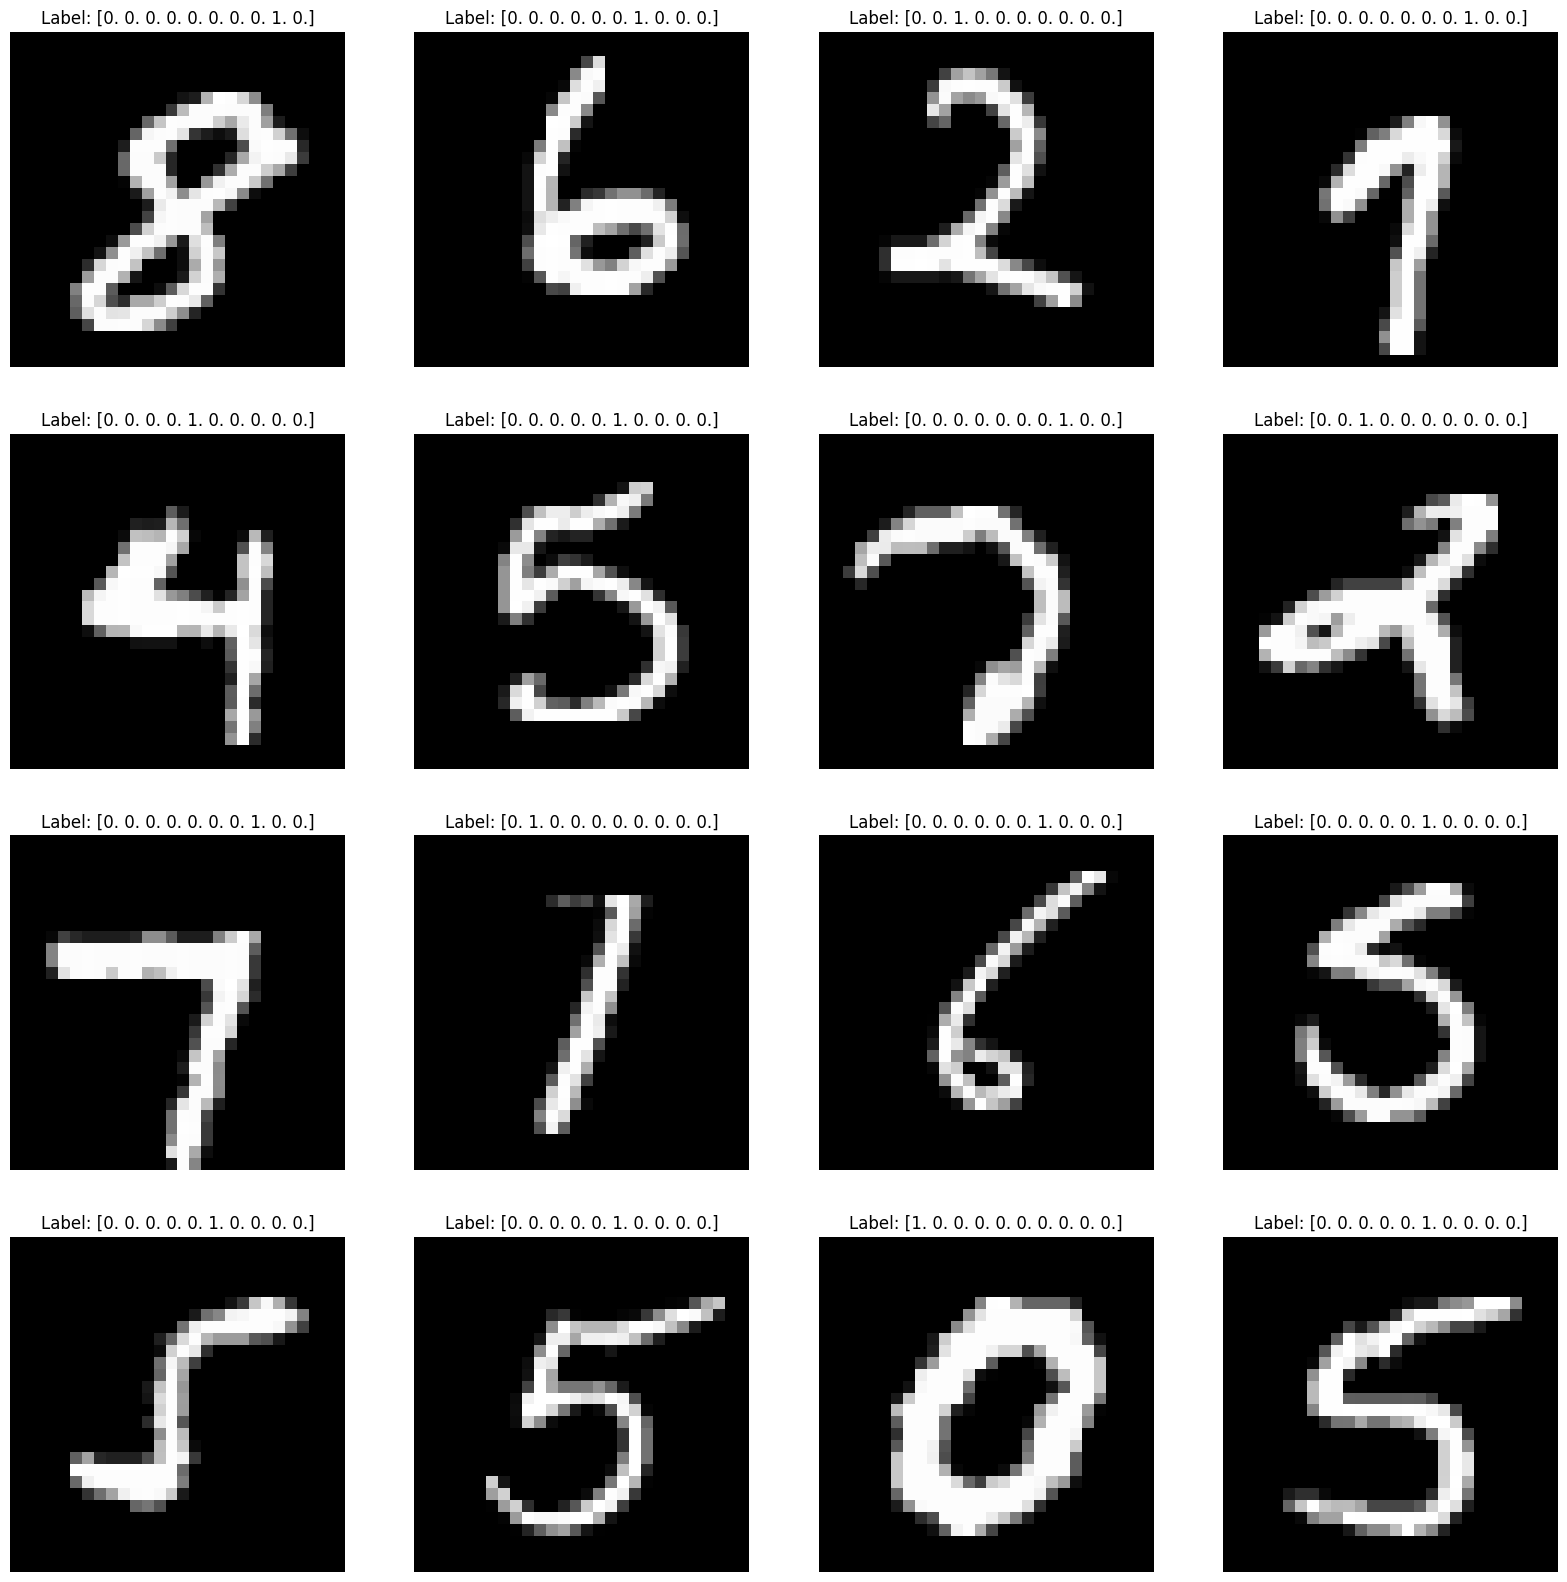

In [239]:
random_indices = np.random.choice(x_train.shape[0], 16)

plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_indices):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train[idx], cmap='gray')
  plt.title(f'Label: {y_train[idx]}')
  plt.axis('off')
plt.show()


In [240]:
# Criar a arquitetura da rede neural com ativação tangente hiperbólica (tanh)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Camada de entrada
    tf.keras.layers.Dense(128, activation='tanh'),  # Camada oculta com 128 neurônios e ativação tangente hiperbólica (tanh)
    tf.keras.layers.Dense(10, activation='softmax')  # Camada de saída com 10 neurônios (um para cada classe) e ativação softmax
])

In [241]:
# Escolher função de perda e otimizador
model.compile(optimizer='adam',  # Gradiente Descendente Estocástico (SGD)
              loss='categorical_crossentropy',  # Função de perda: Entropia cruzada categórica
              metrics=['accuracy'])


In [242]:
# Treinar a rede neural
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))


Epoch 1/10
657/657 [==============================] - 3s 4ms/step - loss: 0.3755 - accuracy: 0.8937 - val_loss: 0.2388 - val_accuracy: 0.9293
Epoch 2/10
657/657 [==============================] - 2s 3ms/step - loss: 0.1996 - accuracy: 0.9429 - val_loss: 0.1796 - val_accuracy: 0.9451
Epoch 3/10
657/657 [==============================] - 3s 5ms/step - loss: 0.1430 - accuracy: 0.9598 - val_loss: 0.1502 - val_accuracy: 0.9538
Epoch 4/10
657/657 [==============================] - 2s 4ms/step - loss: 0.1103 - accuracy: 0.9681 - val_loss: 0.1250 - val_accuracy: 0.9627
Epoch 5/10
657/657 [==============================] - 2s 3ms/step - loss: 0.0877 - accuracy: 0.9751 - val_loss: 0.1146 - val_accuracy: 0.9628
Epoch 6/10
657/657 [==============================] - 2s 4ms/step - loss: 0.0715 - accuracy: 0.9808 - val_loss: 0.1102 - val_accuracy: 0.9654
Epoch 7/10
657/657 [==============================] - 2s 3ms/step - loss: 0.0580 - accuracy: 0.9845 - val_loss: 0.1021 - val_accuracy: 0.9667
Epoch 

In [243]:
# Avaliar o desempenho final no conjunto de teste
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Acurácia no conjunto de teste: {test_accuracy*100:.2f}%")

282/282 [==============================] - 0s 2ms/step - loss: 0.0909 - accuracy: 0.9704
Acurácia no conjunto de teste: 97.04%


In [244]:
# Fazer previsões no conjunto de teste e visualizar algumas previsões
predictions = model.predict(x_test)
num_images_to_show = 5
random_indices = np.random.choice(len(x_test), num_images_to_show)


282/282 [==============================] - 0s 1ms/step


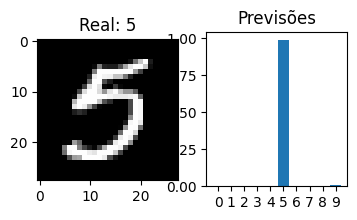

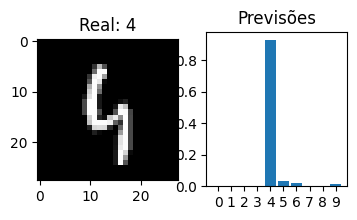

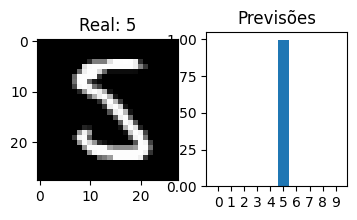

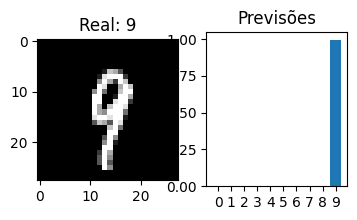

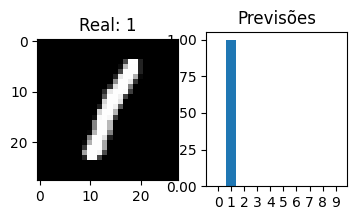

In [245]:
for i in random_indices:
    plt.figure(figsize=(4, 2))

    plt.subplot(1, 2, 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Real: {np.argmax(y_test[i])}")

    plt.subplot(1, 2, 2)
    plt.bar(range(10), predictions[i])
    plt.title("Previsões")
    plt.xticks(range(10), [str(i) for i in range(10)])

    plt.show()

In [248]:

predicted_labels = np.argmax(predictions, axis=1)

# Converter rótulos de one-hot encoding de volta para rótulos inteiros
true_labels = np.argmax(test_labels, axis=1)

# Criar a matriz de confusão
confusion = confusion_matrix(true_labels, predicted_labels)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='viridis', values_format='d')
plt.show()

# Calcular a precisão no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

NameError: ignored